In [2]:
import pickle

import sys 
sys.path.append('../../')
from explainer.single_variable_explainer import SingleVariableExplainer


In [3]:
with open('../models/mimic-ii/model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('../models/mimic-ii/train_X.pkl', 'rb') as f:
    train_X = pickle.load(f)

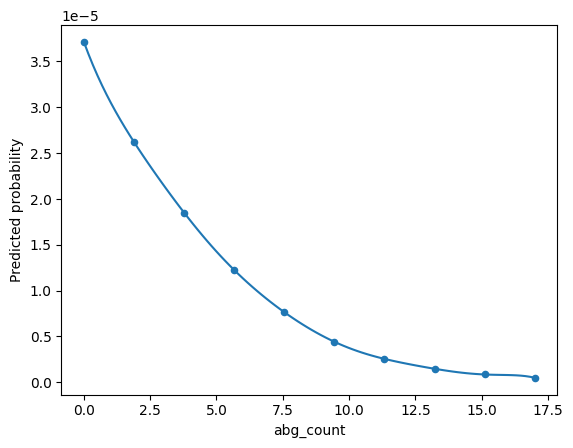

In [4]:
sve = SingleVariableExplainer(
    model,
    'day_28_flg',
    'abg_count',
    train_X.iloc[0],
    train_X,
    bounding_method='quantile',
    number_samples=10
).plot()